<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

El algoritmo de ordenamiento topológico busca una secuencia en un gráfico sin ciclos que respete el orden de precedencia entre sus nodos.

**Entrada:** grafo dirigido sin ciclos de forma G = (V,E)

**Salida:**Orden topológico de los vértices de G, de modo que cada vertice **v** de con arcos de tipo **(v,w)** se cumpla que **f(v) > f(w)**




#2. Descripción del algoritmo

El algoritmo de ordenamiento topológico se verá implementado de dos formas, iterativa y recursiva, ambas utilizando busqueda en post-orden, lo que significa que primero se ingresan los nodos hoja y por último la raíz, para luego al final de la ejecución invertir el orden de los datos y dar por finalizado el problema.

El algoritmo en su versión iterativa busca el orden topológico de la siguiente manera:

1.   Se crea una lista auxiliar para almacenar el orden topológico de los nodos.
2.   Se aplica DFS en post orden para cada nodo del gráfo. Cada nodo visitado es ingresado a la lista auxiliar.
3.   Se retorna la lista auxiliar en reversa, la cuál viene siendo el orden topológico del grafo.

El algoritmo en su versión recursiva lo busca de la siguiente manera:

1. El algoritmo crea un diccionario para almacenar las etiquetas de cada nodo.
2. Se comienzan a recorrer los nodos, donde a cada nodo se le revisan sus adyacentes de forma recursiva hasta llegar a los nodos hojas.
3. Una vez el nodo no tenga adyacentes se añade este al stack.
4. Al terminar de revisar todos los nodos y sus nodos hojas se tiene el stack invertido con el orden topológico del gráfo.


In [110]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

In [111]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

#2.1 Recursive Topological Sorting 

In [112]:
def topoSort(i,state,stack,G,verbose):
  state[i] = "descubierto"                                                      #se marca el nodo como visitado
                                                                                
  if verbose:
    print(f"marcando al nodo {i} con los arcos {G[i]} como visitado")

  for v in G:                                                                   #se recorren los nodos adyacentes al actual
    if state[v] == "no descubierto":
      if verbose:
        print("se comienzan a revisar los nodos adyacentes a este\n")
      topoSort(v, state, stack, G,verbose)

  if verbose:
    print(f"\nse ingresa el nodo {i} al stack")    
  stack.append(i)                                                               #se agregan los nodos despues que se hayan visitado sus adyacentes

In [113]:
def topologicalSort(G,verbose):
  stack = []                                                                    #se inicializa el stack para almacenar de forma inversa los nodos
  state = dict()
  n = len(G) + 2                                                                

  for i in G:
    state[i] = "no descubierto"                                                 #se inicializa cada nodo como no descubierto

  if verbose:
    print(f"Se inicia un diccionario para almacenar el estado de los vertices\n")

  for i in G:
    if state[i] == "no descubierto":
      topoSort(i,state,stack,G,verbose)

  for i in range(0,n):
    for j in range(0,n-1):                                                      #se agregan los nodos hojas al comienzo del stack (por problema de como se entregan los datos
      if j not in stack and len(stack) < n:                                     #hay que hacer este arreglo para que entrege los datos bien, o por lo menos para esta entrada
        stack.insert(i,j)                                                       #puesto que los nodos hojas el algoritmo no los considera y no los revisa)
        
        i+=1                                                                    #este i+=1 se usa en caso de que se encuentre el siguiente valor no se ingrese valores en orden
                                                                                #incorrecto, por ejemplo para este caso, sin este i+=1 el resultado seria 5,4,2,3,0,1 puesto que
                                                                                #se encuentra el 1 luego del 0 pero el i ser == 0 en ese momento se coloca antes del 0.

  return stack[::-1]                                                            #se retorna el stack pero invertido, puesto que al momento de ingresar los datos, como se 
                                                                                #realiza en post orden se ingresan del revés

### Version con verbose (y visualize)

Se inicia un diccionario para almacenar el estado de los vertices

marcando al nodo 6 con los arcos [2, 4] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 5 con los arcos [3, 2, 9] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 0 con los arcos [8, 9] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 4 con los arcos [8] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 1 con los arcos [8] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 9 con los arcos [8, 3, 7, 2] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 7 con los arcos [8] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 3 con los arcos [2] como visitado
se comienzan a revisar los nodos adyacentes a este

marcando al nodo 8 con los arcos [2] como visitado

se ingresa el nodo 8 al stack

se in

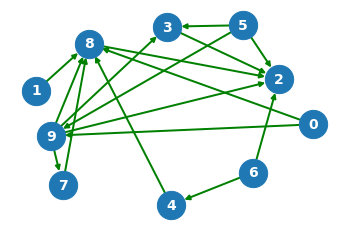

In [97]:
G = graph_instance_creator(10)

#G = defaultdict(list)
#G[5].append(2)
#G[5].append(0)
#G[4].append(0)
#G[4].append(1)
#G[2].append(3)
#G[3].append(1)

grafo = graph_to_nxdigraph(G)

verbose = True

stack = topologicalSort(G,verbose)

print(f"\nEl orden topológico del grafo es: {stack}")

#momento visualize

pos=nx.spring_layout(grafo,3)

labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)

nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

### Version sin verbose

Aqui se utiliza un grafo determinado, los comentarios sobre algunos errores que existian en el código se realizan tomando en cuenta este caso.

In [98]:
G = defaultdict(list)
G[5].append(2)
G[5].append(0)
G[4].append(0)
G[4].append(1)
G[2].append(3)
G[3].append(1)

verbose = False

stack = topologicalSort(G,verbose)

print(f"El orden topológico del grafo es: {stack}")

El orden topológico del grafo es: [5, 4, 2, 3, 1, 0]


#2.2 Iterative Topological Sorting

In [125]:
def IterativeTopoSort(G,verbose):
  state = dict()
  for n in G: 
    state[n] = "no descubierto"                                                 #se crea un diccionario para almacenar los nodos visitados
  
  if verbose:
    print("se crea diccionario para almacenar el estado de cada nodo")

  lista = []                                                                    #se crea la lista auxiliar y el stack
  stack = []

  for i in G:
    if verbose:
      print(f"se marca como visitado el nodo {i}")
    stack = [i]
    while len(stack) > 0:                                                       #aplicando DFS en post-orden
      n=stack.pop()
      if state[i] == "no descubierto":                                          #se marca el nodo actual y se devuelve al stack
        state[i] = "descubierto"
        stack.append(i)
        for ady in G:                                        #se recorren los nodos adyacentes del nodo actual
          if verbose:
            print(f"se buscan los nodos adyacentes al nodo {i}, si no estan descubiertos se añaden al stack")
          if state[i] == "no descubierto":
            if verbose:
              print(f"nodo adyacente: {ady}") 
            stack.append(ady)
      elif state[i] == "descubierto" and state[i] != "visitado":                #en la segunda vuelta se comienzan a marcar como visitados y se agregan a la lista
        if verbose:
          print(f"se revisa por segunda vez el nodo {i} y se agrega a la lista\n")
        state[i] = "visitado"
        lista.append(i)

  lista = list(reversed(lista))
  i = 0
  for j in range(0,len(G)):                                                     #se aplica el mismo parche que en la implementación anterior
    if j not in lista:
      lista.insert(i,j) 
      i+=1                    

  return lista[::-1]

#2.2.1 Version con verbose (y visualize)

se crea diccionario para almacenar el estado de cada nodo
se marca como visitado el nodo 6
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 6, si no estan descubiertos se añaden al stack
se revisa por segunda vez el nodo 6 y se agrega a la lista

se marca como visitado el nodo 7
se buscan los nodos adyacentes al nodo 7, si no estan descubiertos se añaden al stack
se buscan los nodos adyacentes al nodo 7, 

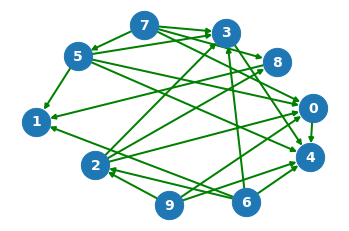

In [128]:
G = graph_instance_creator(10)
#G = defaultdict(list)
#G[5].append(2)
#G[5].append(0)
#G[4].append(0)
#G[4].append(1)
#G[2].append(3)
#G[3].append(1)

verbose = True

stack = IterativeTopoSort(G,verbose)

print(f"El orden topológico del grafo es: {stack}")

#momento visualize

grafo = graph_to_nxdigraph(G)

pos=nx.spring_layout(grafo,3)

labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)

nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

#2.2.2 Version sin verbose

In [127]:
G = defaultdict(list)
G[5].append(2)
G[5].append(0)
G[4].append(0)
G[4].append(1)
G[2].append(3)
G[3].append(1)

verbose = False

stack = IterativeTopoSort(G,verbose)

print(f"El orden topológico del grafo es: {stack}")

El orden topológico del grafo es: [5, 4, 2, 3, 1, 0]


#3. Tiempo de ejecución

El algoritmo tiene un tiempo de ejecución de $O(V+E)$ donde **V** representa la cantidad de nodos (o vertices) y **E** representa a los arcos entre ellos.

**Prueba del Teorema**

Esto se puede comprobar de la siguiente manera:
1.  El algoritmo ingresa únicamente una vez a cada vertice al stack, lo cuál nos da una complejida de $O(V)$

2.  Por cada vertice, el algoritmo recorre una única vez sus conexiones, lo que finalmente nos da que su complejidad es de $O(E)$

Si juntamos estas complejidades nos da que la complejidad total (o tiempo de ejecución) del algoritmo es de $O(V+E)$

#4. Correctitud

La correctitud de este algoritmo puede ser explicada de forma similar a la del DFS, puesto que su implementación son similares.

El algoritmo llamará a cada vértice una única vez, puesto que al momento de llamar a este se le colocará una etiqueta para indicar que ya fue analizado. Provocando que cada vértice tenga una etiqueta distinta que va desde **1** hasta **n**, siendo **n** la cantidad de vértices totales.

###**Prueba del teorema:**

Caso base (n = 1): si el grafo recibido tiene únicamente un nodo, el orden topológico será iguál a 1.

Caso 1: si **V** se descubre antes que **W**, se tiene que **V** se llama como nodo inicial antes de que **W** se marque como explorado. Como **W** es alcanzable desde **V** y se llama recursivamente en **W**, debido al funcionamiento **LIFO** de las llamadas recursivas, la llamada en **W** se completa antes que la de **V**, por lo que según la etiqueta **f(w) > f(v)**.

Caso 2: supongamos que **W** es descubierto antes que **V**, como **G** es un grafo **DAG** no hay camino de **W** a **v**, por otro lado, combinar este camino con el arco **(V,W)** produciría un ciclo directo. Por lo que esta termina con **V** como inexplorado, nuevamente esto produce que la llamada en **W** se complete antes, y que se mantenga que **f(W) > f(V)**.


#5. Experimentos


A continuación se mostrarán los gráficos en base al tiempo de ambos algoritmos para observar que pasa si vamos aumentando la cantidad de nodos.

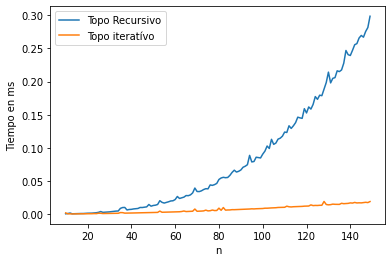

In [129]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(10,150):
  g = graph_instance_creator(n)
  verbose = False

  t1 = repeat(setup="from __main__ import topologicalSort", stmt=f"topologicalSort({list(g)},{verbose})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import IterativeTopoSort", stmt=f"IterativeTopoSort({list(g)},{verbose})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["Topo Recursivo", "Topo iteratívo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

###análisis de resultados

Como se puede ver en el gráfico anterior, a medida que van creciendo la cantidad de nodos se va formando una curva exponencial, esto puede ser explicado a través de la complejidad del algoritmo. La complejidad del algoritmo toma en cuenta la cantidad de nodos y sus arcos totales, como cada nodo puede llegar a tener más de un solo arco, nos da la posibilidad de que en ese instante la complejidad crezca más rapido mayor. En otras palabras, el tiempo de ejecución del algoritmo va a depender de como se esté formando el gráfo, puesto que, si cada nodo solo tiene un arco, tendriamos un crecimiento lineal, si cada nodo puede un número aleatorio de arcos el crecimiento va a ser exponencial.



Ahora comparando ambas implementaciones.
Se tiene que el algoritmo iterativo resuelve el problema de forma más rápida que la version recursiva, esto se debe a las llamadas recursivas que quedan en espera hasta que se lleguen a los nodos hojas para luego devolverse y terminar de visitar todos los nodos. En cambio, la version iterativa revisa, visita y almacena los resultados a medida que encuentra los valores.